In [1]:
import requests

In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from citipy import citipy
from datetime import datetime
from config import weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lats_lngs = zip(lats, lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in lats_lngs:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

623

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cape town
Processing Record 2 of Set 1 | samusu
City not found. Skipping...
Processing Record 3 of Set 1 | tomatlan
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | nanortalik
Processing Record 6 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 7 of Set 1 | saskylakh
Processing Record 8 of Set 1 | mahebourg
Processing Record 9 of Set 1 | grand centre
City not found. Skipping...
Processing Record 10 of Set 1 | cherskiy
Processing Record 11 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 12 of Set 1 | kudahuvadhoo
Processing Record 13 of Set 1 | georgetown
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | chokurdakh
Processing Record 16 of Set 1 | mar del plata
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | hermanus
Processing Record 19 of Set 1 | hobart
Processing Record 20 of Set 1 | longye

Processing Record 35 of Set 4 | college
Processing Record 36 of Set 4 | mayumba
Processing Record 37 of Set 4 | lata
Processing Record 38 of Set 4 | puerto escondido
Processing Record 39 of Set 4 | kargil
Processing Record 40 of Set 4 | zhanatas
City not found. Skipping...
Processing Record 41 of Set 4 | darlawn
Processing Record 42 of Set 4 | tuktoyaktuk
Processing Record 43 of Set 4 | kyenjojo
Processing Record 44 of Set 4 | rundu
Processing Record 45 of Set 4 | grants pass
Processing Record 46 of Set 4 | galgani
City not found. Skipping...
Processing Record 47 of Set 4 | sola
Processing Record 48 of Set 4 | kodiak
Processing Record 49 of Set 4 | paamiut
Processing Record 50 of Set 4 | bengkulu
Processing Record 1 of Set 5 | krapina
Processing Record 2 of Set 5 | ferme-neuve
Processing Record 3 of Set 5 | sao joao da barra
Processing Record 4 of Set 5 | roma
Processing Record 5 of Set 5 | great yarmouth
Processing Record 6 of Set 5 | swellendam
Processing Record 7 of Set 5 | tilichik

Processing Record 19 of Set 8 | kabanjahe
Processing Record 20 of Set 8 | ahipara
Processing Record 21 of Set 8 | khuzhir
Processing Record 22 of Set 8 | kaeo
Processing Record 23 of Set 8 | smolenka
Processing Record 24 of Set 8 | callander
Processing Record 25 of Set 8 | fonte boa
Processing Record 26 of Set 8 | nome
Processing Record 27 of Set 8 | igrim
Processing Record 28 of Set 8 | beringovskiy
Processing Record 29 of Set 8 | atasu
Processing Record 30 of Set 8 | karratha
Processing Record 31 of Set 8 | faanui
Processing Record 32 of Set 8 | kenai
Processing Record 33 of Set 8 | halalo
City not found. Skipping...
Processing Record 34 of Set 8 | zavetnoye
Processing Record 35 of Set 8 | mendi
Processing Record 36 of Set 8 | pombas
Processing Record 37 of Set 8 | miri
Processing Record 38 of Set 8 | coahuayana
Processing Record 39 of Set 8 | zapolyarnyy
Processing Record 40 of Set 8 | matara
Processing Record 41 of Set 8 | usinsk
Processing Record 42 of Set 8 | muros
Processing Rec

Processing Record 7 of Set 12 | virginia beach
Processing Record 8 of Set 12 | takestan
Processing Record 9 of Set 12 | koumac
Processing Record 10 of Set 12 | koutiala
Processing Record 11 of Set 12 | manado
Processing Record 12 of Set 12 | shiyan
Processing Record 13 of Set 12 | sorland
Processing Record 14 of Set 12 | alyangula
Processing Record 15 of Set 12 | blagoyevo
Processing Record 16 of Set 12 | coihaique
Processing Record 17 of Set 12 | hohhot
Processing Record 18 of Set 12 | turukhansk
Processing Record 19 of Set 12 | yaan
Processing Record 20 of Set 12 | solnechnyy
Processing Record 21 of Set 12 | utiroa
City not found. Skipping...
Processing Record 22 of Set 12 | guaruja
Processing Record 23 of Set 12 | thinadhoo
Processing Record 24 of Set 12 | vangaindrano
Processing Record 25 of Set 12 | coffs harbour
Processing Record 26 of Set 12 | sakakah
Processing Record 27 of Set 12 | necochea
Processing Record 28 of Set 12 | tazovskiy
Processing Record 29 of Set 12 | mwinilunga


In [6]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cape Town,-33.9258,18.4232,48.11,75,40,1.99,ZA,2021-07-21 20:23:30
1,Tomatlan,19.9333,-105.2500,91.49,59,8,8.21,MX,2021-07-21 20:26:57
2,Albany,42.6001,-73.9662,78.46,63,57,3.00,US,2021-07-21 20:20:06
3,Nanortalik,60.1432,-45.2371,44.78,99,100,5.82,GL,2021-07-21 20:24:56
4,Saskylakh,71.9167,114.0833,55.24,80,100,11.10,RU,2021-07-21 20:24:53
5,Mahebourg,-20.4081,57.7000,70.09,64,20,14.97,MU,2021-07-21 20:25:35
6,Cherskiy,68.7500,161.3000,54.57,53,4,1.30,RU,2021-07-21 20:26:59
7,Kudahuvadhoo,2.6708,72.8944,82.87,76,100,13.11,MV,2021-07-21 20:27:00
8,Georgetown,5.4112,100.3354,83.89,85,20,3.44,MY,2021-07-21 20:25:11
9,Jamestown,42.0970,-79.2353,74.30,61,20,8.01,US,2021-07-21 20:24:22


In [7]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

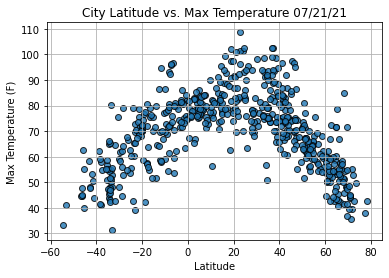

In [9]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

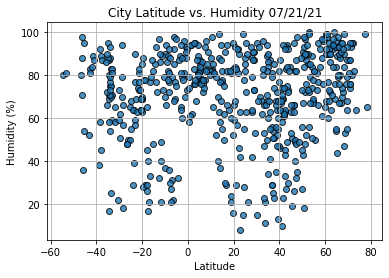

In [10]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

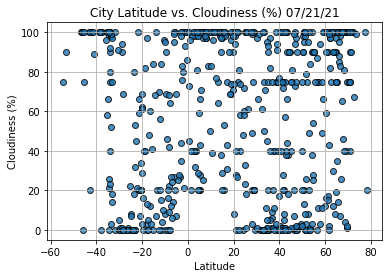

In [11]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

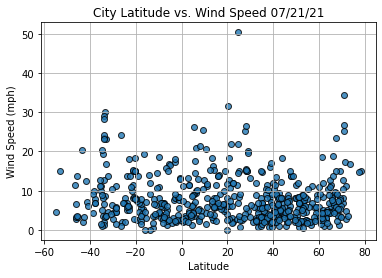

In [12]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [13]:
# Import linregress
from scipy.stats import linregress
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [14]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

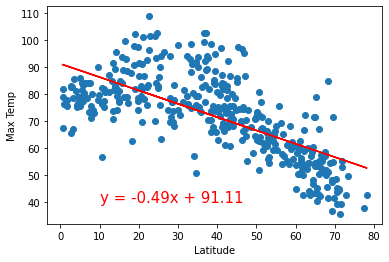

In [15]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

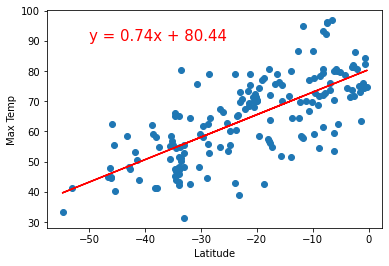

In [16]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

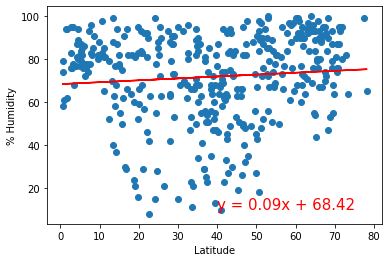

In [17]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

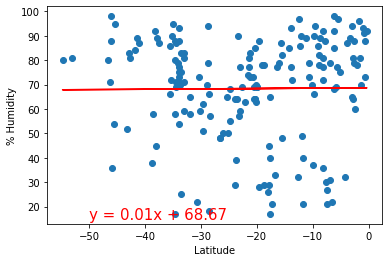

In [19]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))